In [1]:
#importing necessary liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#importing the data set
df=pd.read_csv("/content/1729258-1613615-Stock_Price_data_set_(1).csv")

In [3]:
#showing top 10 features of the data set
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [4]:
#checking datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
#checking for null values in the data set
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
#checking for duplicate values in the data set
df.duplicated().sum()

0

In [7]:
#overall info of the data set
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


Data Vizulatation


In [8]:
import seaborn as sns
def vizulazing(col):
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

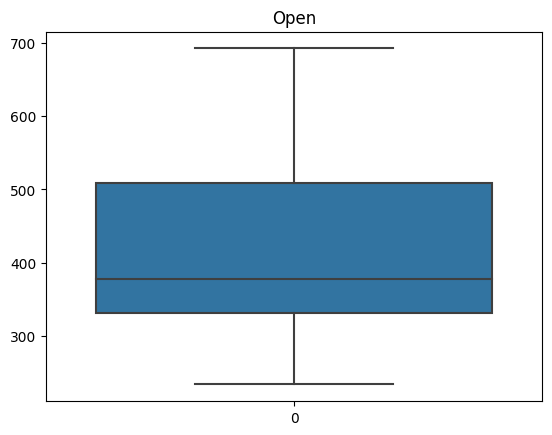

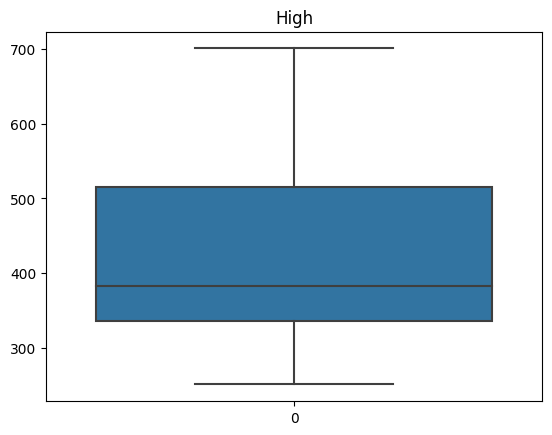

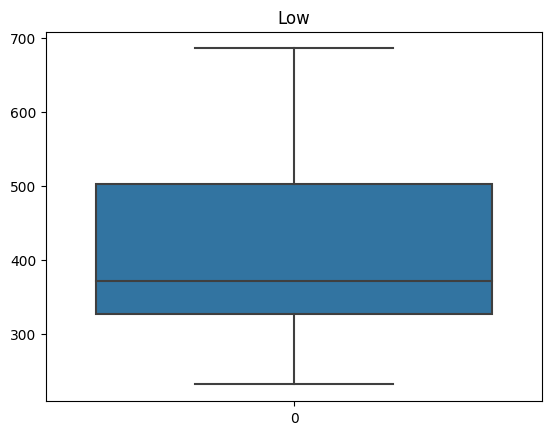

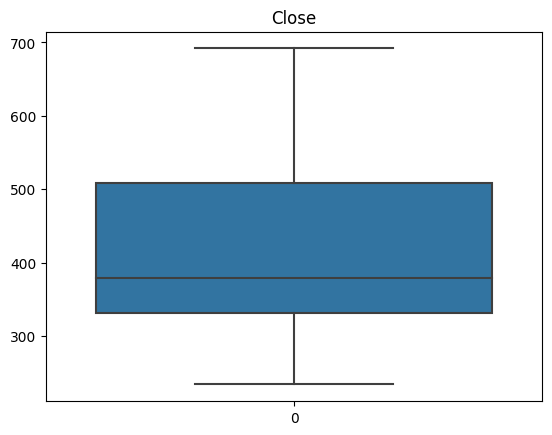

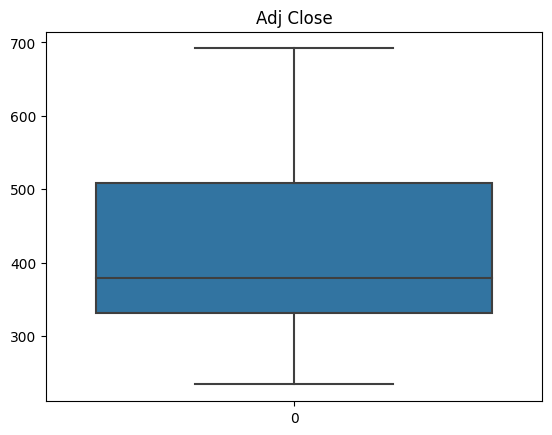

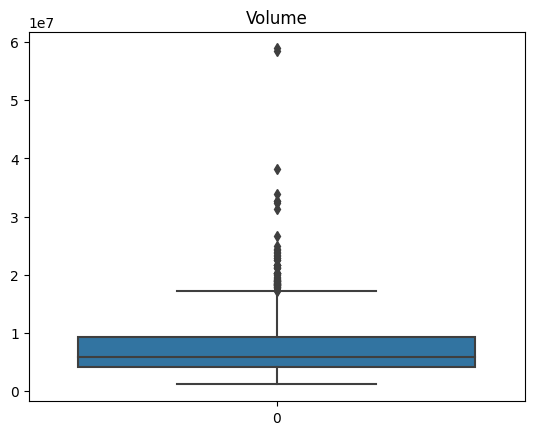

In [9]:
list_of_columns=df.columns[1:]
for col in list_of_columns:
  vizulazing(col)


Obsevation
------outliers are only exist in the volume feature


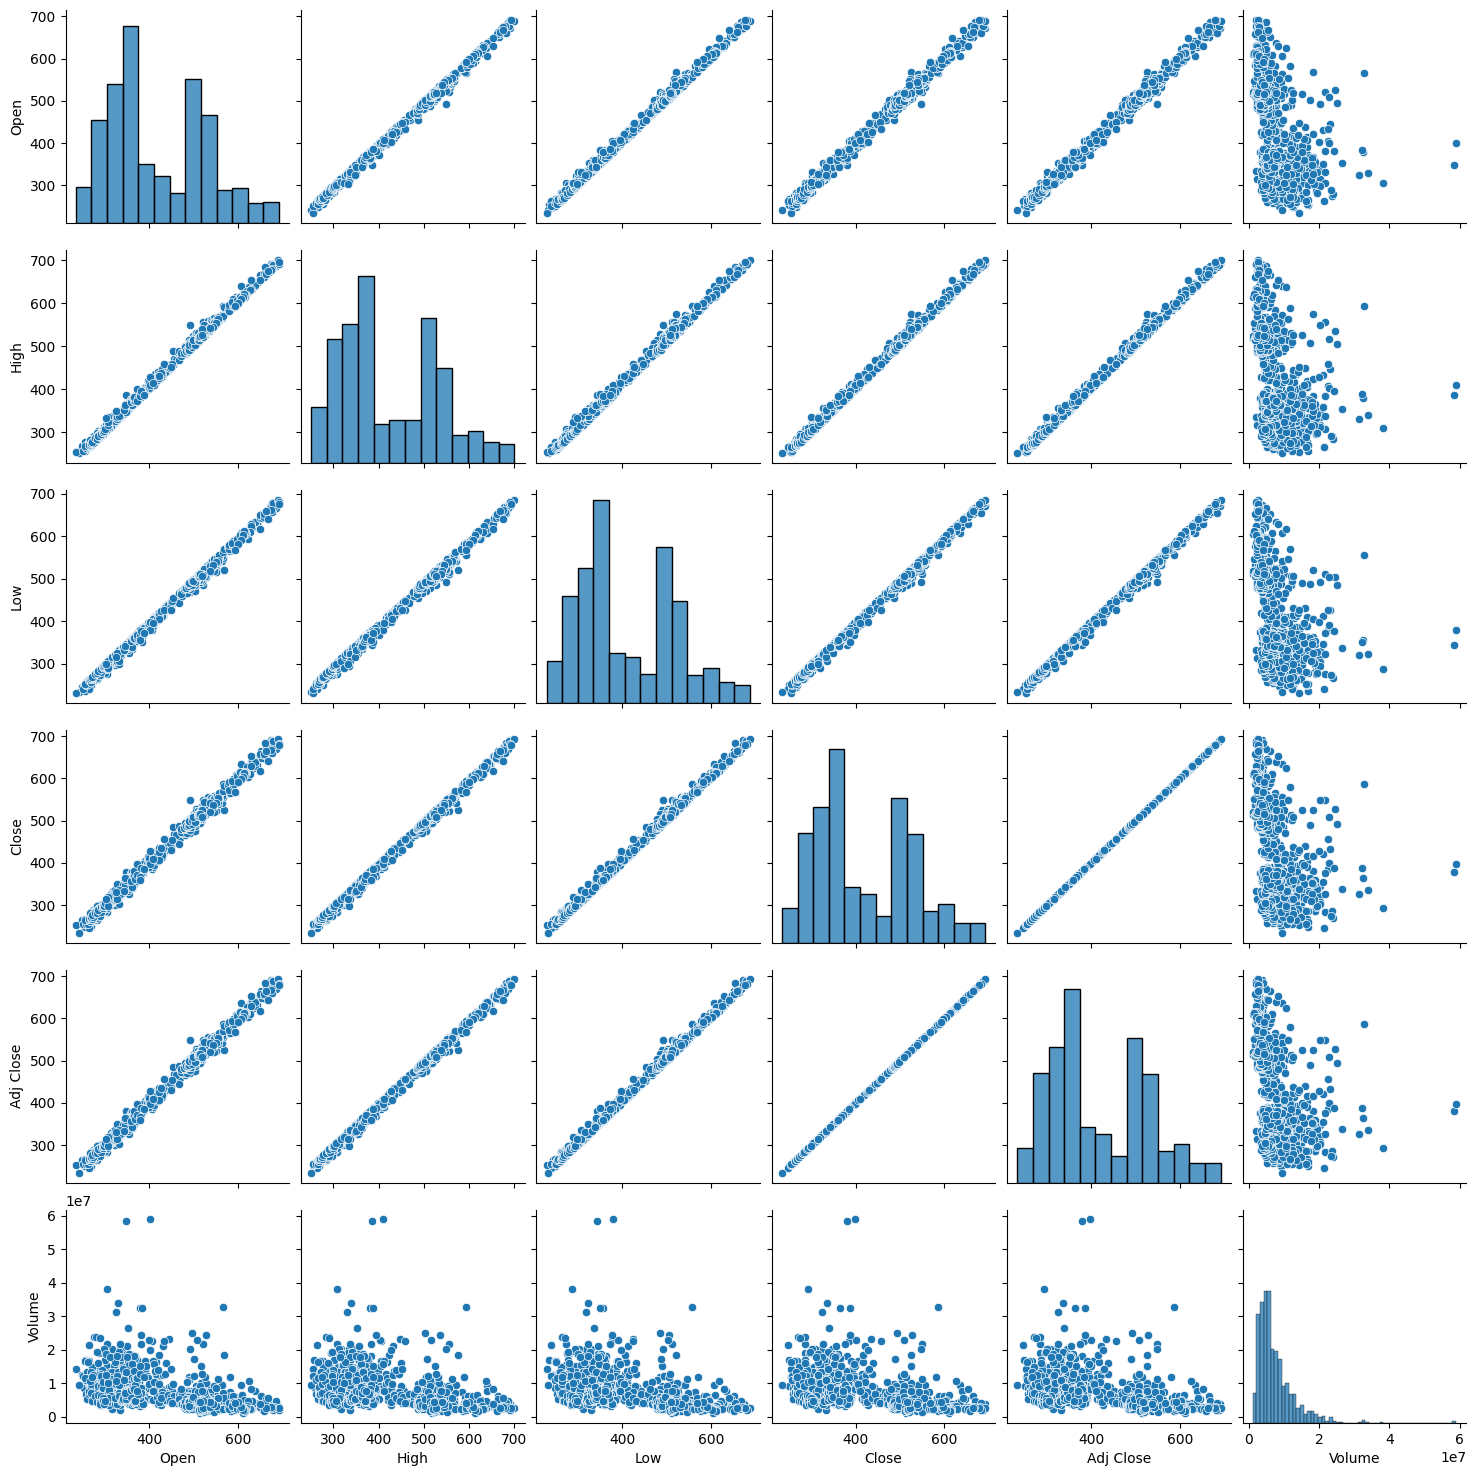

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
#adding new feature
df["lag1"]=df["Close"].shift(1)
df["lag2"]=df["Close"].shift(2)
df["lag3"]=df["Close"].shift(3)
df["lag4"]=df["Close"].shift(4)


In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,lag1,lag2,lag3,lag4
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,NaN,NaN,NaN
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,254.259995,NaN,NaN,NaN
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,265.720001,254.259995,NaN,NaN
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,264.559998,265.720001,254.259995,NaN
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,250.100006,264.559998,265.720001,254.259995


In [13]:
df=df.fillna(0)

In [14]:
#correlatation matrix
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(18,10))
df.corr()


,Open,High,Low,Close,Adj Close,Volume,lag1,lag2,lag3,lag4
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838,0.995217,0.987655,0.980126,0.972928
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699,0.994001,0.986389,0.979143,0.972247
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116,0.993780,0.985901,0.978270,0.971110
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.992152,0.984763,0.977417,0.970589
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.992152,0.984763,0.977417,0.970589
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000,-0.404405,-0.399250,-0.392421,-0.387886
lag1,0.995217,0.994001,0.993780,0.992152,0.992152,-0.404405,1.000000,0.992266,0.984997,0.977827
lag2,0.987655,0.986389,0.985901,0.984763,0.984763,-0.399250,0.992266,1.000000,0.992400,0.985317
lag3,0.980126,0.979143,0.978270,0.977417,0.977417,-0.392421,0.984997,0.992400,1.000000,0.992537
lag4,0.972928,0.972247,0.971110,0.970589,0.970589,-0.387886,0.977827,0.985317,0.992537,1.000000


<Figure size 1800x1000 with 0 Axes>

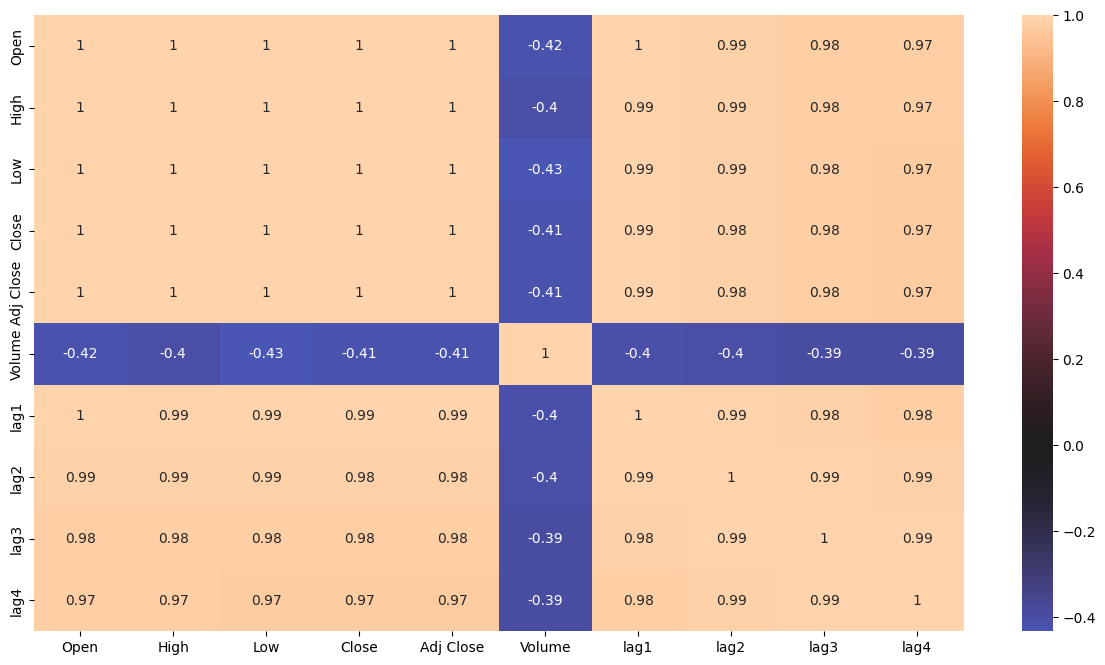

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,center=0)
plt.show()

Observatation:

  volume is feature is negetively correleted with the close feature


In [16]:
#Scatter Plot
def scatterploting(col):
  sns.scatterplot(df[col])
  plt.title(col)
  plt.show()

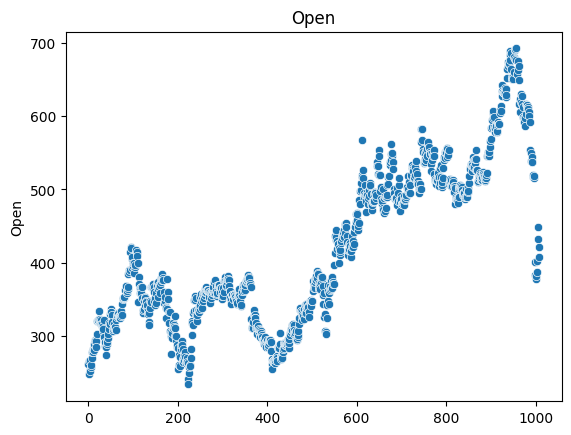

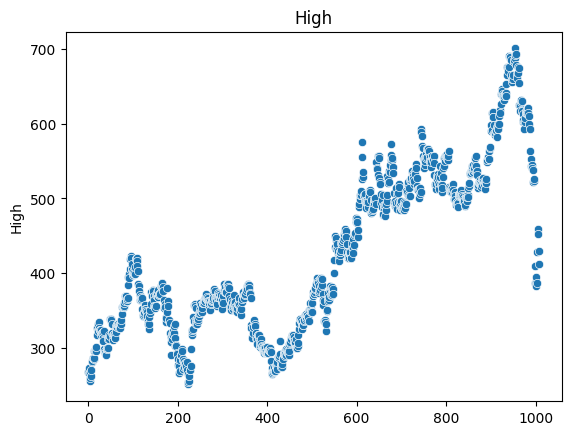

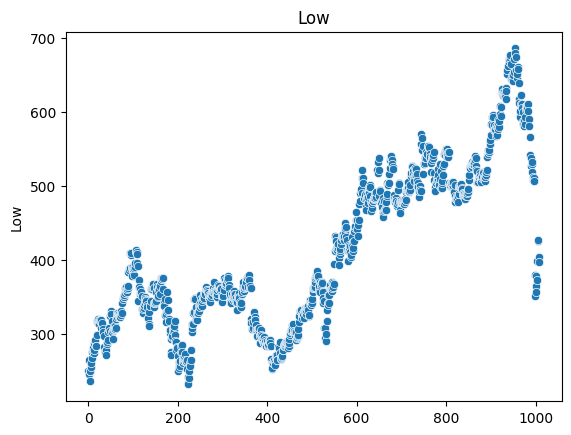

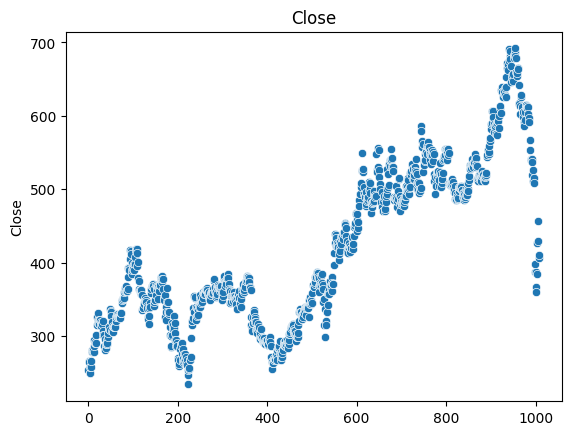

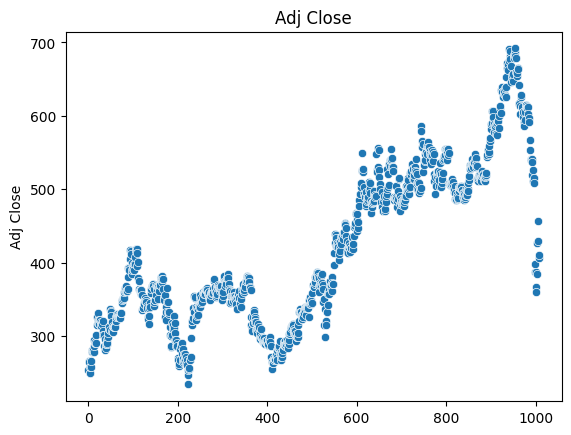

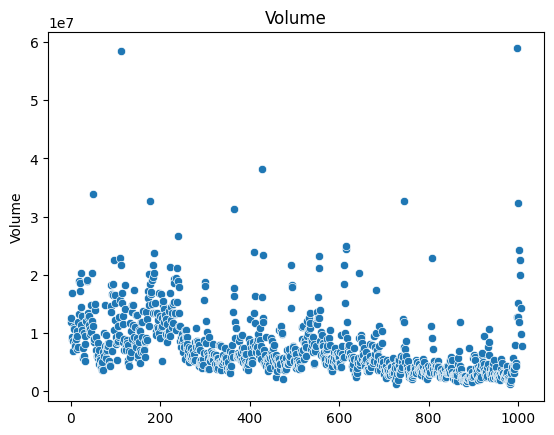

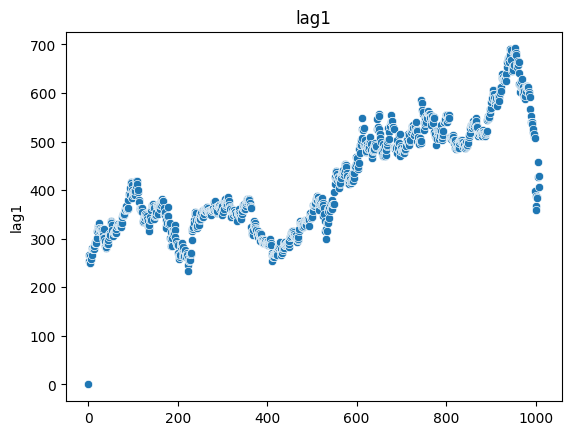

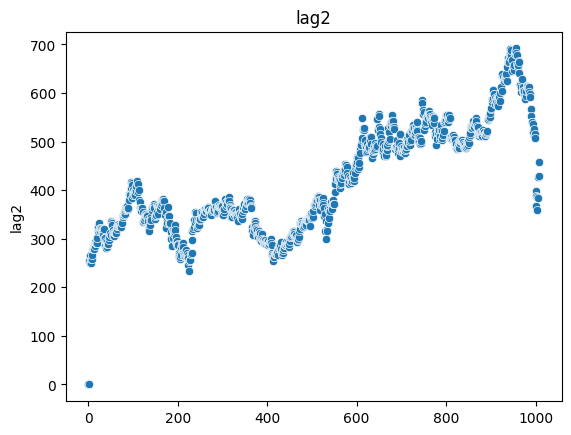

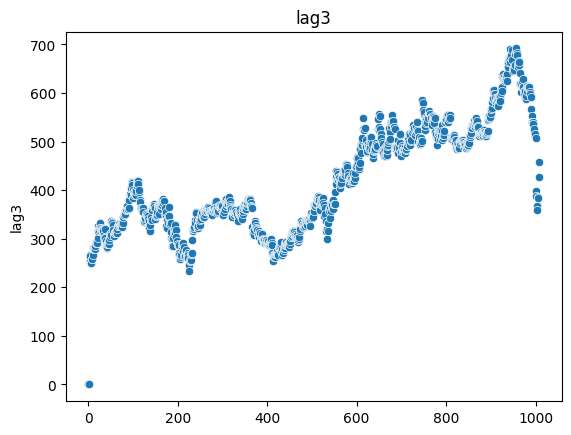

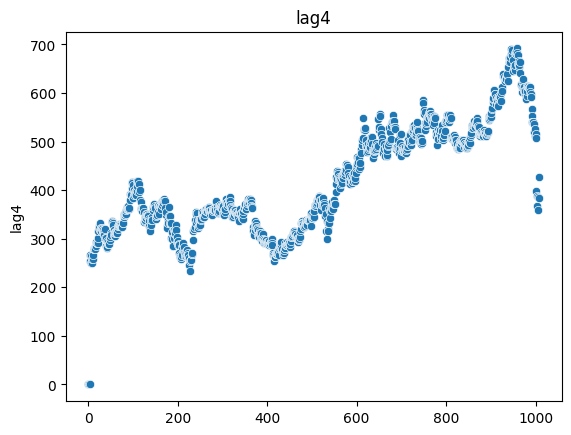

In [17]:
list_of_columns=df.columns[1:]
for col in list_of_columns:
  scatterploting(col)

In [18]:
#distrubution plot
from seaborn.distributions import kdeplot
def distrubutionploting(col):
  sns.displot(df[col],kde=True)
  plt.title(col)
  plt.show()

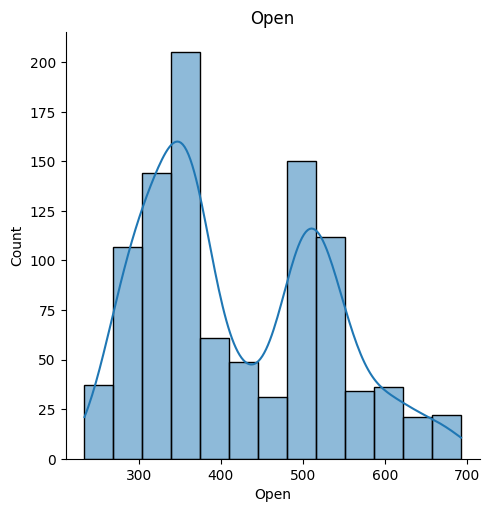

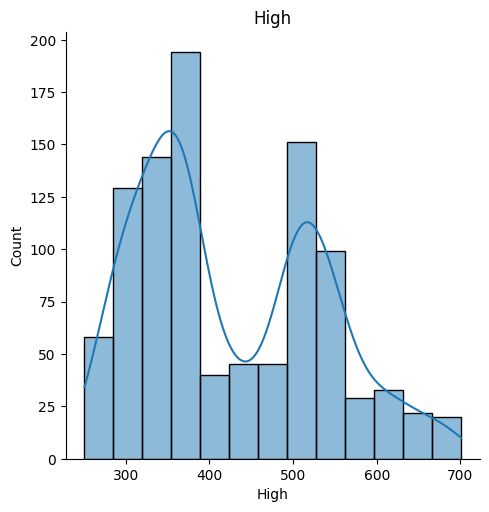

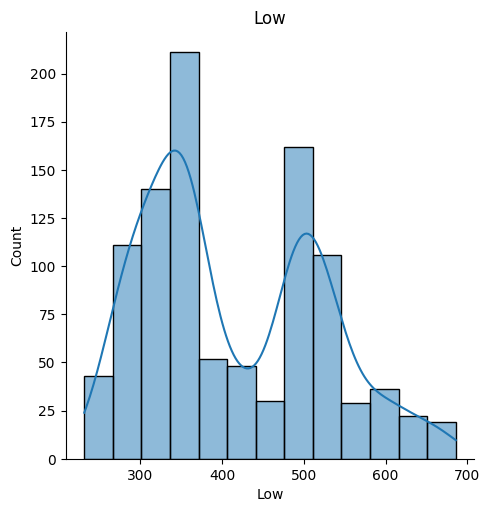

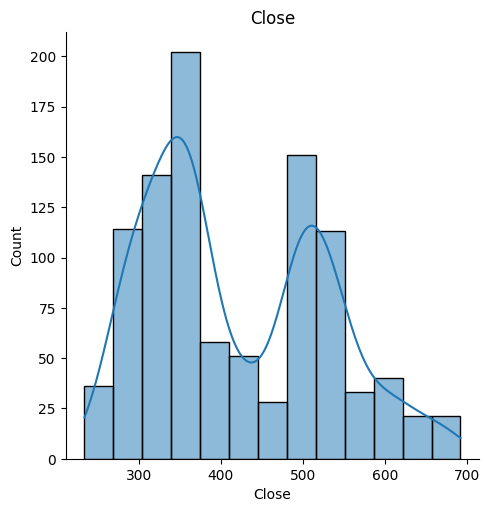

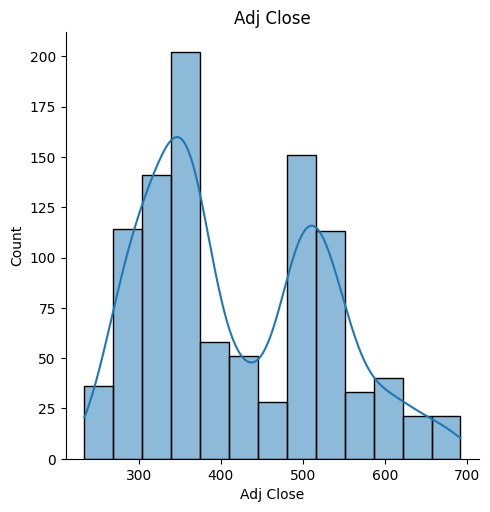

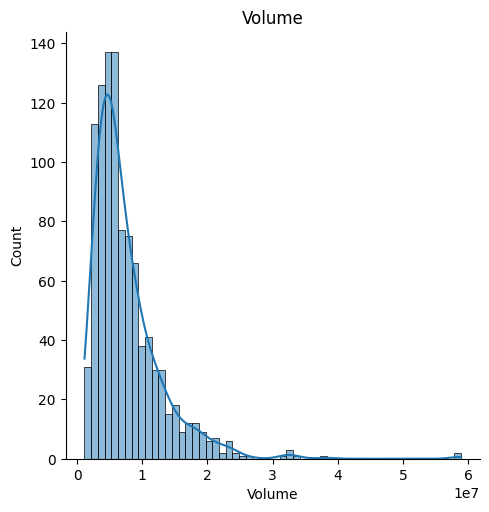

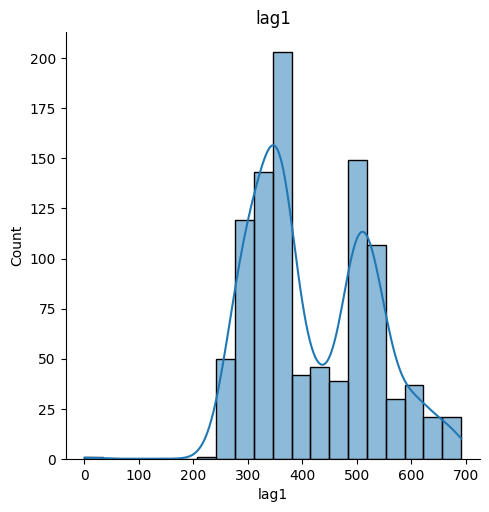

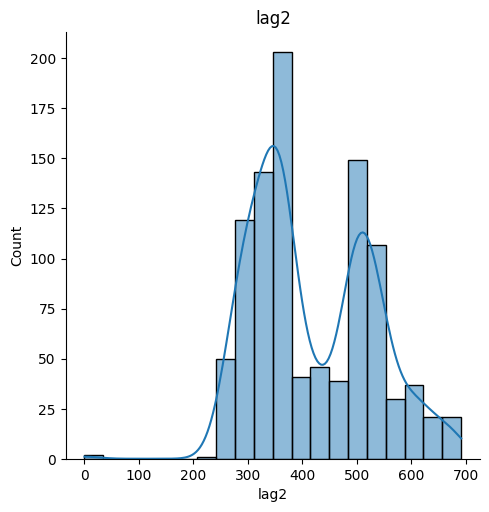

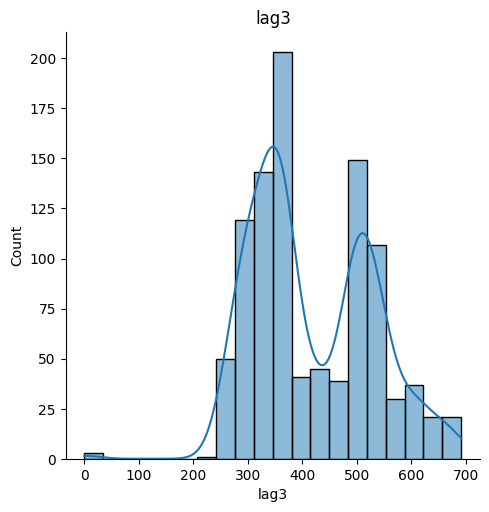

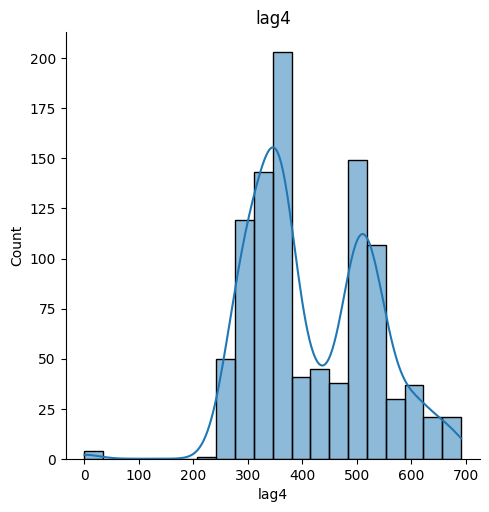

In [19]:
list_of_columns=df.columns[1:]
for col in list_of_columns:
  distrubutionploting(col)

In [20]:
#save a copy
saved_data=df.copy()

In [21]:
#drop volume and adj close,Date feature
df.drop(["Volume","Adj Close","Date"],inplace=True,axis=1)

In [22]:
# changing the position of the close feaure to last
values_of_close=df["Close"]
df.drop("Close",axis=1,inplace=True)
df.insert(7,"Close",values_of_close)


In [23]:
df.head()

,Open,High,Low,lag1,lag2,lag3,lag4,Close
0,262.000000,267.899994,250.029999,0.000000,0.000000,0.000000,0.000000,254.259995
1,247.699997,266.700012,245.000000,254.259995,0.000000,0.000000,0.000000,265.720001
2,266.579987,272.450012,264.329987,265.720001,254.259995,0.000000,0.000000,264.559998
3,267.079987,267.619995,250.000000,264.559998,265.720001,254.259995,0.000000,250.100006
4,253.850006,255.800003,236.110001,250.100006,264.559998,265.720001,254.259995,249.470001


In [24]:
#converting all the values into normal form
from scipy import stats
df["Open"]=stats.boxcox(df["Open"])[0]
df["High"]=stats.boxcox(df["High"])[0]
df["Low"]=stats.boxcox(df["Low"])[0]
df["Close"]=stats.boxcox(df["Close"])[0]
df["lag1"].iloc[1:]=stats.boxcox(df["lag1"].iloc[1:])[0]
df["lag2"].iloc[2:]=stats.boxcox(df["lag2"].iloc[2:])[0]
df["lag3"].iloc[3:]=stats.boxcox(df["lag3"].iloc[3:])[0]
df["lag4"].iloc[4:]=stats.boxcox(df["lag4"].iloc[4:])[0]


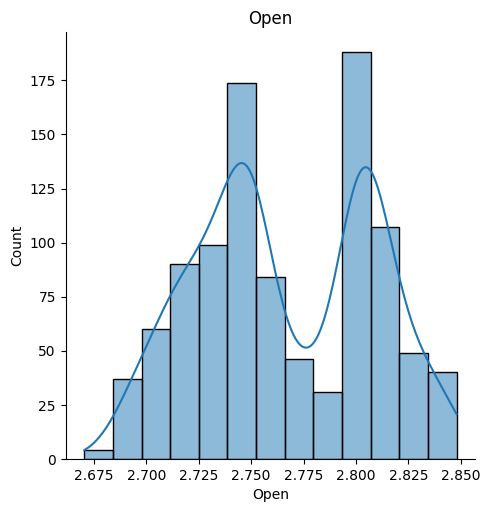

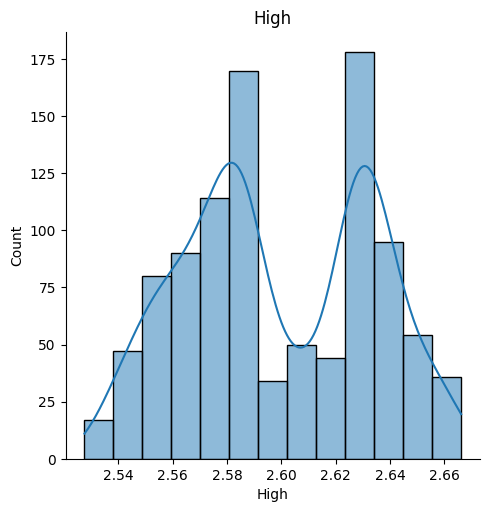

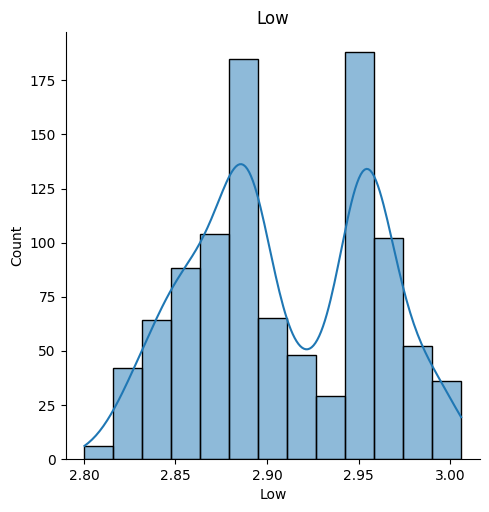

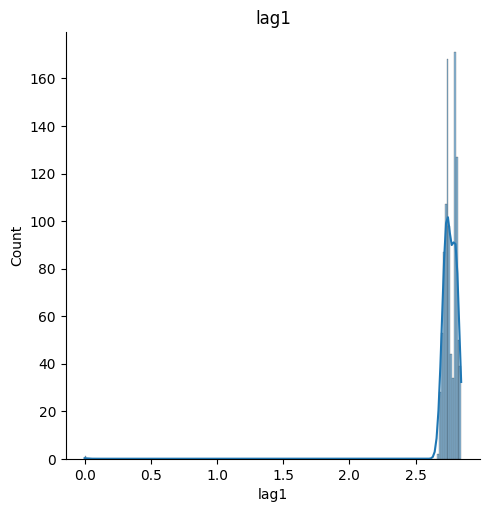

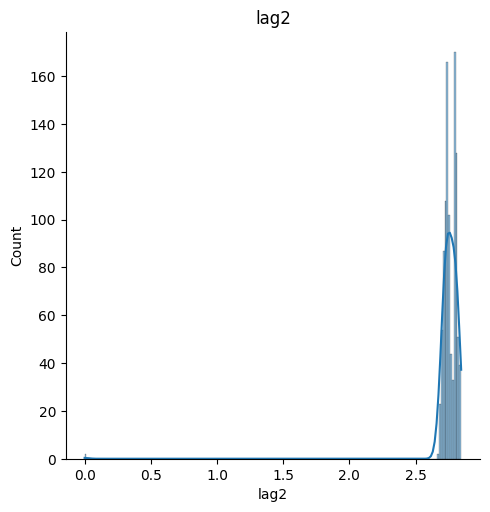

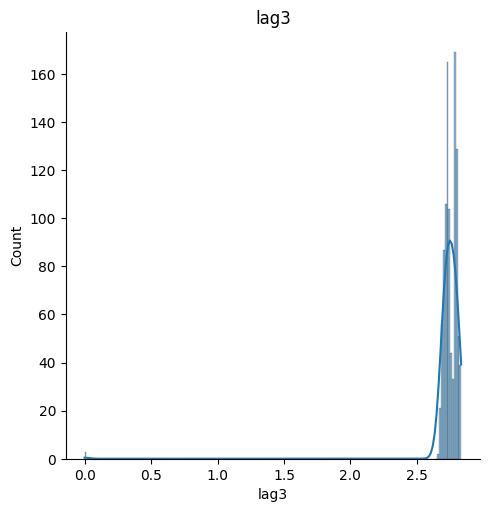

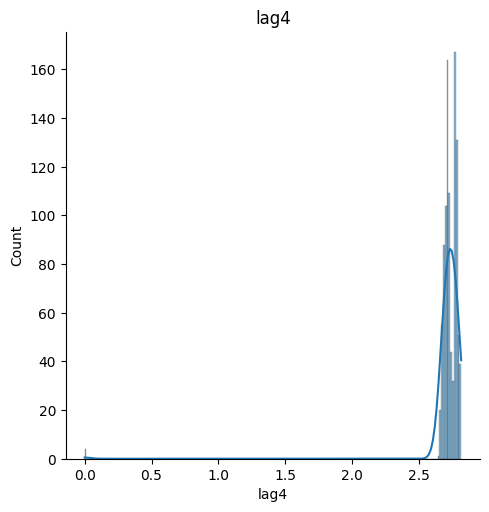

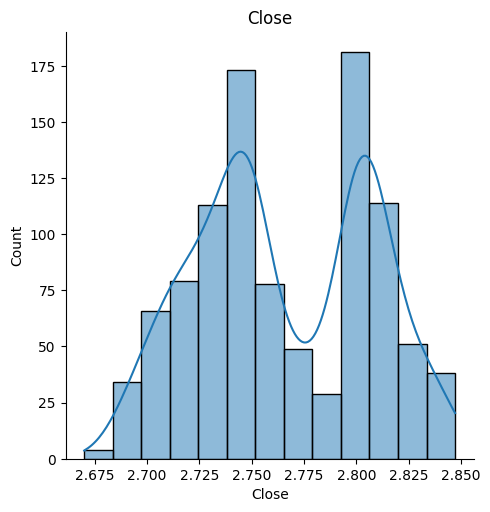

In [25]:
#checking the distrubution again
list_of_columns=df.columns
for col in list_of_columns:
  distrubutionploting(col)

In [26]:
#checking the range of the values
df.describe()

,Open,High,Low,lag1,lag2,lag3,lag4,Close
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,2.766113,2.598898,2.909423,2.760397,2.757069,2.744679,2.723712,2.765542
std,0.041522,0.034168,0.048513,0.096303,0.129683,0.155433,0.176539,0.041424
min,2.670465,2.527497,2.800321,0.000000,0.000000,0.000000,0.000000,2.669911
25%,2.733964,2.572075,2.872121,2.731058,2.730130,2.720549,2.702615,2.733476
50%,2.756094,2.590450,2.897355,2.753197,2.752611,2.742816,2.724641,2.755921
75%,2.803464,2.629587,2.953322,2.800359,2.799748,2.789715,2.770741,2.802853
max,2.847984,2.666146,3.005971,2.844620,2.843981,2.833487,2.813647,2.847229


Modeling


In [27]:
#selecting target column
x=df.drop("Close",axis=1)
y=df["Close"]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(807, 7)
(807,)
(202, 7)


In [29]:
#LinearRegression
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)

In [30]:
#evaluation matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))

0.0024308462582575594
0.0012830182896472115


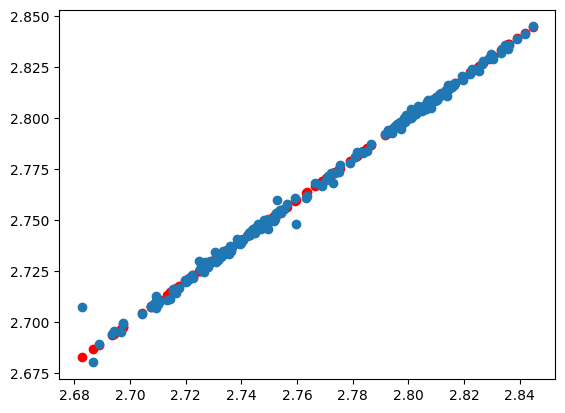

In [31]:
plt.scatter(y_test,y_test,color="red")
plt.scatter(y_test,y_pred)
plt.show()

In [32]:
#Lasso
from sklearn.linear_model import Lasso
lasso_model=Lasso()
lasso_model.fit(x_train,y_train)
lasso_predicition=lasso_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,lasso_predicition)))

0.04117427210880627


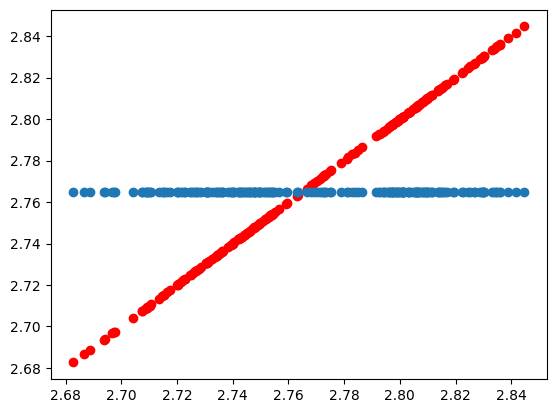

In [33]:
plt.scatter(y_test,y_test,color="red")
plt.scatter(y_test,lasso_predicition)
plt.show()

In [34]:
#Ridge
from sklearn.linear_model import Ridge
ridge_model=Ridge()
ridge_model.fit(x_train,y_train)
ridge_predicition=ridge_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,ridge_predicition)))

0.008179663335678176


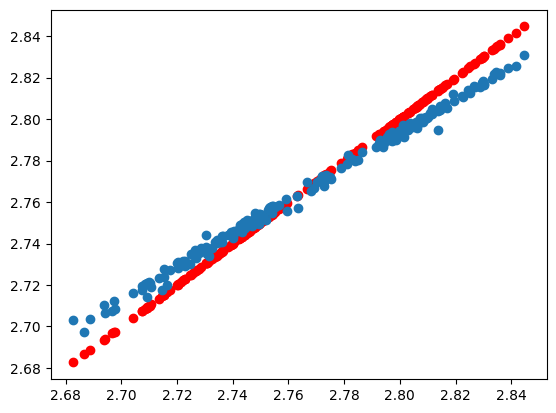

In [35]:
plt.scatter(y_test,y_test,color="red")
plt.scatter(y_test,ridge_predicition)
plt.show()

In [36]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
random_model_t=RandomForestRegressor()
random_model_t.fit(x_train,y_train)
random_predict_t=random_model_t.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,random_predict_t)))

0.0022089168972625364


In [37]:
#DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor
decision_model_t=DecisionTreeRegressor()
decision_model_t.fit(x_train,y_train)
decision_predict_t=decision_model_t.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,decision_predict_t)))

0.0028586089524696035


In [38]:
#KNN model
from sklearn.neighbors import KNeighborsRegressor
kneighbour_model_t=KNeighborsRegressor()
kneighbour_model_t.fit(x_train,y_train)
kneighbour_predict_t=kneighbour_model_t.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,kneighbour_predict_t)))

0.002917947036326567


In [39]:
# bagging
from sklearn.ensemble import BaggingRegressor
bagging_model=BaggingRegressor()
bagging_model.fit(x_train,y_train)
bagging_predict=bagging_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,bagging_predict)))

0.0022356384283659593


In [40]:
 #  Bboosting
from sklearn.ensemble import GradientBoostingRegressor
gradiet_model=GradientBoostingRegressor()
gradiet_model.fit(x_train,y_train)
gradiet_predict=gradiet_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,gradiet_predict)))

0.0022931415814000035


In [41]:
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
#xgb model
from xgboost import XGBRFRegressor
xgb_model=XGBRFRegressor()
xgb_model.fit(x_train,y_train)
xgb_predict=xgb_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,xgb_predict)))

0.0023563139479361294


In [43]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
#lgbm model
from lightgbm import LGBMRegressor
lgb_model=LGBMRegressor()
lgb_model.fit(x_train,y_train)
lgb_predict=lgb_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,lgb_predict)))

0.0021870339755629795


In [45]:
! pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.1 MB/s eta 0:00:00


In [46]:
#cata boost model
from catboost import CatBoostRegressor
cat_model=CatBoostRegressor()
cat_model.fit(x_train,y_train)
cat_predict=cat_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,cat_predict)))

Learning rate set to 0.039579
0:	learn: 0.0399989	total: 49.4ms	remaining: 49.3s
1:	learn: 0.0385600	total: 51.4ms	remaining: 25.6s
2:	learn: 0.0371724	total: 53.3ms	remaining: 17.7s
3:	learn: 0.0358135	total: 55.6ms	remaining: 13.8s
4:	learn: 0.0345560	total: 58ms	remaining: 11.5s
5:	learn: 0.0332862	total: 61ms	remaining: 10.1s
6:	learn: 0.0320859	total: 64ms	remaining: 9.08s
7:	learn: 0.0309345	total: 67.6ms	remaining: 8.38s
8:	learn: 0.0298753	total: 71.2ms	remaining: 7.84s
9:	learn: 0.0288180	total: 75.2ms	remaining: 7.45s
10:	learn: 0.0277949	total: 77.5ms	remaining: 6.97s
11:	learn: 0.0267812	total: 79.8ms	remaining: 6.57s
12:	learn: 0.0258352	total: 82.2ms	remaining: 6.24s
13:	learn: 0.0248979	total: 84.5ms	remaining: 5.95s
14:	learn: 0.0240003	total: 86.8ms	remaining: 5.7s
15:	learn: 0.0231355	total: 89ms	remaining: 5.47s
16:	learn: 0.0223040	total: 91.4ms	remaining: 5.28s
17:	learn: 0.0215158	total: 93.7ms	remaining: 5.11s
18:	learn: 0.0207624	total: 96.1ms	remaining: 4.96s
1

In [47]:
#optimizing the parameters
from sklearn.model_selection import GridSearchCV
def optimizin_the_parameters(function,params):
  func=GridSearchCV(
      estimator=function,
      param_grid=params,
      cv=5,
      n_jobs=-1,
      scoring=mean_squared_error
  )
  func.fit(x_train,y_train)
  return f"{function} : {func.best_score_} . best parameters are {func.best_params_}"



In [48]:
##lassoo regression
params={"alpha":[0.0000001,0.001,0.002,0.01,0.02,0.04,0.05]}
optimizin_the_parameters(Lasso(),params)

"Lasso() : nan . best parameters are {'alpha': 1e-07}"

In [49]:
lass_model=Lasso(alpha=0.0000001)
lass_model.fit(x_train,y_train)
lass_predict_t=lass_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,lass_predict_t)))

0.0018479957957239993


In [50]:
##Ridge regression
params={"alpha":[0.001,0.002,0.01,0.02,0.04,0.05]}
optimizin_the_parameters(Ridge(),params)

"Ridge() : nan . best parameters are {'alpha': 0.001}"

In [51]:
ridge_model=Ridge(alpha=0.001)
ridge_model.fit(x_train,y_train)
ridge_predict_t=ridge_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,ridge_predict_t)))

0.0019011180294073449


In [ ]:
#randomforset
params={"n_estimators":[50,100,150,200,250],
        "max_depth":[5,10,11,12],
        "min_samples_split":np.linspace(1,10,num=20,endpoint=True),
        "min_samples_leaf":np.arange(1,11)}
optimizin_the_parameters(RandomForestRegressor(),params)

"RandomForestRegressor() : nan . best parameters are {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 1.0, 'n_estimators': 50}"

In [ ]:
random_model=RandomForestRegressor(max_depth= 5,min_samples_leaf= 1,min_samples_split=1.0,n_estimators=50)
random_model.fit(x_train,y_train)
random_predict=random_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,random_predict)))

0.04117061414403654


In [ ]:
##decision tree
parameters={"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "splitter":["best", "random"],
            "max_depth":np.arange(2,10),
            "min_samples_split":np.arange(2,10),
            "min_samples_leaf":np.arange(2,10),
            "min_weight_fraction_leaf":np.linspace(0,0.5,num=5,endpoint=True)}
optimizin_the_parameters(DecisionTreeRegressor(),parameters)

"DecisionTreeRegressor() : nan . best parameters are {'criterion': 'squared_error', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}"

In [ ]:

decision_model=DecisionTreeRegressor(criterion='squared_error',max_depth= 2, min_samples_leaf=2,min_samples_split= 2,min_weight_fraction_leaf=0.0,splitter='best')
decision_model.fit(x_train,y_train)
decision_predict=decision_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,decision_predict)))

0.011026410010493662


In [ ]:
parameters={"n_neighbors":np.arange(1,7),
            "p":[1,2,3],
            "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
            "leaf_size":[10,20,30,40]}
optimizin_the_parameters(KNeighborsRegressor(),parameters)

"KNeighborsRegressor() : nan . best parameters are {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'p': 1}"

In [ ]:

kneighbour_model=KNeighborsRegressor(algorithm='auto',leaf_size= 10,n_neighbors= 1,p= 1)
kneighbour_model.fit(x_train,y_train)
kneighbour_predict=kneighbour_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,kneighbour_predict)))

0.003499558556020171


Summary All Model Scores


In [ ]:
#summary of scores
def getscore(model):
  return np.sqrt(mean_squared_error(y_test,model))

In [ ]:
model_scores=pd.DataFrame({"Model":["linear","lasso","ridge","knn","randomforest","decisiontree","bagging","gradientboosting","xgboost","catboost","lightgbm",
                                    ],
                           "Score":[getscore(y_pred),getscore(lass_predict_t),getscore(ridge_predict_t),getscore(kneighbour_predict_t),
                                    getscore(random_predict_t),getscore(decision_predict_t),getscore(bagging_predict),getscore(gradiet_predict),
                                    getscore(xgb_predict),getscore(cat_predict),getscore(lass_predict_t)]})
model_scores

,Model,Score
0,linear,0.002431
1,lasso,0.001848
2,ridge,0.001901
3,knn,0.002918
4,randomforest,0.002243
5,decisiontree,0.002802
6,bagging,0.002297
7,gradientboosting,0.002279
8,xgboost,0.002356
9,catboost,0.002439


From the above we can say thay lasso and lightgbm model gives
best score.


In [53]:
import pickle
pickle.dump(lass_model,open("stockprice.pkl","wb"))